# Polynomial Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement Polynomial Regression
*   Create a model, train it, test it and use the model

### Importing Needed packages


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

## Understanding the Data

### `FuelConsumption.csv`:

We have a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [55]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


select some features that we want to use for regression.


In [56]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,8.5,9.9,6.7,196
1,2.4,4,9.6,11.2,7.7,221
2,1.5,4,5.9,6.0,5.8,136
3,3.5,6,11.1,12.7,9.1,255
4,3.5,6,10.6,12.1,8.7,244
5,3.5,6,10.0,11.9,7.7,230
6,3.5,6,10.1,11.8,8.1,232
7,3.7,6,11.1,12.8,9.0,255
8,3.7,6,11.6,13.4,9.5,267


##### plot Emission values with respect to ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY:


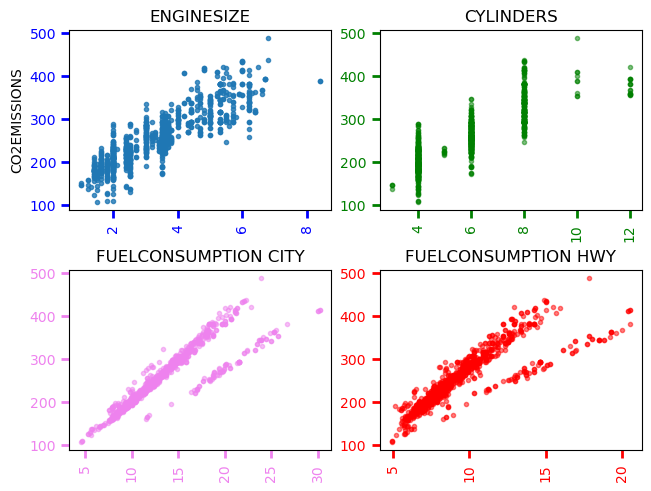

In [57]:
fig, axs = plt.subplots(2, 2,layout='constrained')

ax = axs[0][0]
ax.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,marker='.',alpha=0.8)
ax.set_title('ENGINESIZE')
ax.set_ylabel('CO2EMISSIONS')
ax.tick_params(direction='out', length=6, width=2, colors='b', grid_alpha=1)
ax.tick_params(axis='x', rotation=90)

ax = axs[0][1]
ax.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='green',marker='.',alpha=0.5)
ax.set_title('CYLINDERS')
ax.tick_params(direction='out', length=6, width=2, colors='g', grid_alpha=1)
ax.tick_params(axis='x', rotation=90)

ax = axs[1][0]
ax.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS,color='violet',marker='.',alpha=0.5)
ax.set_title('FUELCONSUMPTION CITY')
ax.tick_params(direction='out', length=6, width=2, colors='violet', grid_alpha=1)
ax.tick_params(axis='x', rotation=90)

ax = axs[1][1]
ax.scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS,color='red',marker='.',alpha=0.5)
ax.set_title('FUELCONSUMPTION HWY')
ax.tick_params(direction='out', length=6, width=2, colors='r', grid_alpha=1)
ax.tick_params(axis='x', rotation=90)

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [58]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynomial regression</h2>


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [59]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

fit_transform takes our x values, and outputs a list of our data raised from power 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

\[
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n
\end{bmatrix}

\begin{bmatrix}
1 & v_1 & v_1^2 \\
1 & v_2 & v_2^2 \\
\vdots & \vdots & \vdots \\
1 & v_n & v_n^2
\end{bmatrix}
\]
### sample of first three values of dataset
\[
\begin{bmatrix}
2 \\
3 \\
1.5
\end{bmatrix}

\begin{bmatrix}
1 & 2 & 4 \\
1 & 3 & 9 \\
1 & 1.5 & 2.25
\end{bmatrix}
\]

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does.
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x\_1$, $x\_1^2$ with $x\_2$, and so on. Then the degree 2 equation would be turn into:

$$y = b + \theta\_1  x\_1 + \theta\_2 x\_2$$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use **LinearRegression()** function to solve it:


In [60]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         54.03503136 -2.02596458]]
Intercept:  [102.08670239]


As mentioned before, **Coefficient** and **Intercept** , are the parameters of the fit curvy line.
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


Text(0, 0.5, 'Emission')

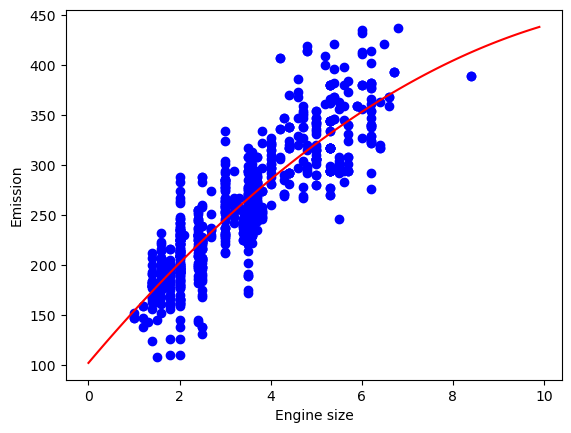

In [61]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>


In [62]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 23.70
Residual sum of squares (MSE): 990.82
R2-score: 0.77


<h2 id="practice">More Practice</h2>
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

#### train/test split

In [63]:
train_x: list = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y: list = np.asanyarray(train[['CO2EMISSIONS']])

test_x: list = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y: list = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print('train_x_poly',train_x_poly)
print('train_x',train_x)

train_x_poly [[  1.    11.2  125.44]
 [  1.    12.1  146.41]
 [  1.    11.9  141.61]
 ...
 [  1.    13.2  174.24]
 [  1.    12.9  166.41]
 [  1.    14.9  222.01]]
train_x [[11.2]
 [12.1]
 [11.9]
 [11.8]
 [12.8]
 [10.6]
 [12.1]
 [18. ]
 [18. ]
 [17.4]
 [18.1]
 [17.4]
 [18. ]
 [11.5]
 [10.8]
 [11.5]
 [11.5]
 [10.8]
 [12. ]
 [ 9.8]
 [13.1]
 [13.1]
 [13.5]
 [10. ]
 [14.7]
 [10.1]
 [11.8]
 [12. ]
 [12.9]
 [ 9.9]
 [15.1]
 [12.9]
 [17.6]
 [21.2]
 [17.6]
 [21.2]
 [21.1]
 [15.3]
 [15.2]
 [14.6]
 [13.2]
 [13.3]
 [14.2]
 [14.2]
 [10.4]
 [11.5]
 [11.5]
 [15.4]
 [18.8]
 [16.8]
 [20. ]
 [16.7]
 [20. ]
 [20. ]
 [22.3]
 [10. ]
 [10.2]
 [ 7.6]
 [ 7.6]
 [10. ]
 [10.4]
 [10.6]
 [10.6]
 [10.6]
 [11.4]
 [11.8]
 [11.9]
 [11.9]
 [10.4]
 [10.6]
 [11.8]
 [11.7]
 [11.9]
 [10.2]
 [10.6]
 [ 9.2]
 [14.4]
 [15. ]
 [11.9]
 [15. ]
 [12.5]
 [15. ]
 [10.5]
 [15. ]
 [15. ]
 [17.3]
 [16.2]
 [17.3]
 [16.2]
 [17.3]
 [17.3]
 [16.2]
 [10.6]
 [11.2]
 [12.6]
 [16.3]
 [18.1]
 [13.6]
 [16.4]
 [10.8]
 [10.4]
 [13.7]
 [12.7]
 [14.

#### train model

In [64]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         31.48418504 -0.59119757]]
Intercept:  [-48.22275023]


#### plot output

Text(0, 0.5, 'Emission')

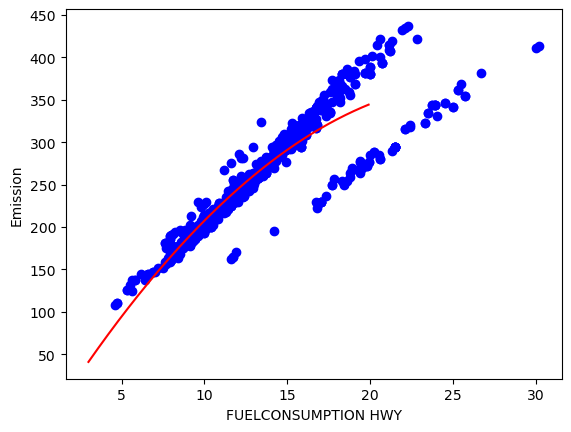

In [65]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,color='blue')
XX = np.arange(3, 20.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION HWY")
plt.ylabel("Emission")

#### Evaluation

In [66]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

R2-score: 0.84


#### I think that this kinda models not enough good these days because we have **DEEP LEARNING** but it's good for itself.

#### Maby if we can use it in a difrent way, it show us its real potential.